In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import bicgstab
from scipy.sparse import csr_matrix
from math import sqrt

In [2]:
def generate_matrix(size, sparsity):
    # Generate a random symmetric matrix
    A = np.random.rand(size, size)
    A = (A + A.T) / 2  # Ensuring symmetry
    
    # Set a fraction of elements to zero for sparsity
    mask = np.random.choice([0, 1], size=(size, size), p=[sparsity, 1 - sparsity])
    A = A * mask
    
    # Adjust diagonal elements to ensure strict diagonal dominance
    for i in range(size):
        A[i, i] = np.sum(np.abs(A[i])) + 1
    
    # Ensure positive definiteness
    A = A + size * np.identity(size)
    return A

def nondiagdom(size, sparsity):
    A = np.random.rand(size, size)
    A[A < sparsity] = 0
    np.fill_diagonal(A, 1)
    return A

def nonsym(size,sparsity):
    A = np.random.rand(size, size)
    A[A < sparsity] = 0
    A += np.eye(size) * np.random.rand(size)
    return A

In [ ]:
def separate_diagonal(A):
    n, m = A.shape
    if n != m:
        raise ValueError("Input matrix must be square.")
    diag_A = np.zeros_like(A)
    off_diag_A = np.zeros_like(A)
    np.fill_diagonal(diag_A, np.diag(A))
    off_diag_A = A - diag_A
    return diag_A, off_diag_A

In [ ]:
def jacobi(mesh,A,u,b,threshold,w1,w2,w3):
    error=list()
    itr=0
    while(1): 
        for x in range (1,mesh-1):
            for y in range (1,mesh-1):
                A[x][y]= w1*(u[x-1][y]+u[x+1][y])+w2*(u[x][y-1]+u[x][y+1])+w3*(b[x][y])
        u_flat=u.flatten()
        A_flat=A.flatten()
        error.append(np.linalg.norm(A-u))
        u=A.copy()
        #plotHeat(u,'Output')
        itr+=1
        if(error[-1]<threshold):
            return error,u,itr 

In [6]:
def conjugate_gradient(A, u, b,threshold):
    print("Conjugate Gradient Algorithm")
    x = u.flatten() # Initial guess x0
    r = b - A.dot(x)  # Compute r0
    #print(r)
    p = r.copy()  # Set p0 to r0
    rs_old = np.dot(r, r)
    itr=0
    while(1):
        print("iteration: ", itr)
        itr+=1
        Ap = A.dot(p)
        alpha = rs_old / p.dot(Ap)
        x += alpha * p
        
        r -= alpha * Ap
        rs_new = np.dot(r, r)
        error= np.linalg.norm(r)
        if error < threshold:
            print("Error in ", itr-1 ," itr: ",error)
            break  # Convergence achieved
        if error >10e4:
            print("Diverged")
            break
        beta = rs_new / rs_old
        p = r + beta * p
        rs_old = rs_new
        print("Error in ",itr-1, " itr: ",error)
    return x

In [7]:
def plotContour(matrix,title):
    x = np.arange(matrix.shape[1])
    y = np.arange(matrix.shape[0])
    X, Y = np.meshgrid(x, y)
    plt.contour(X, Y, matrix)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot of '+title+' Matrix' )
    plt.colorbar()
    plt.show()
def plotHeat(matrix,title):
    plt.imshow(matrix, origin='lower')  # Set origin to lower
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Heat Map of '+title+' Matrix' )
    plt.show()
def plotError(error,itr):
    plt.plot(range(0, itr), error, marker='o')
    plt.xlabel('Iteration Number')
    plt.ylabel('Error')
    plt.title('Error vs. Iteration Number')
    plt.grid(True)
    plt.show()

In [8]:
#Setting Parameters
delta_x=1
delta_y=1
w1=pow(delta_x,2)/(2*(pow(delta_x,2)+pow(delta_y,2)))
w2=pow(delta_y,2)/(2*(pow(delta_x,2)+pow(delta_y,2)))
w3=pow(delta_x,2)*pow(delta_y,2)/(2*(pow(delta_x,2)+pow(delta_y,2)))

Error after  191  iterations:  9.886718908340855e-06


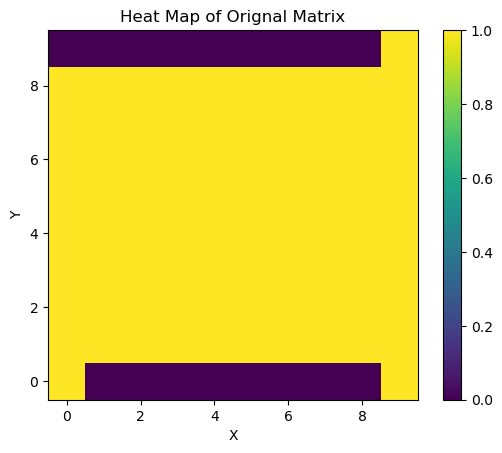

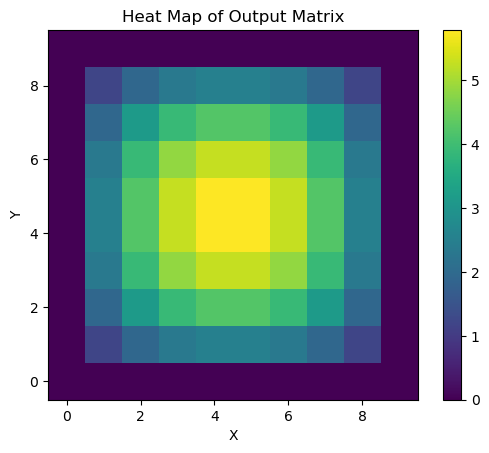

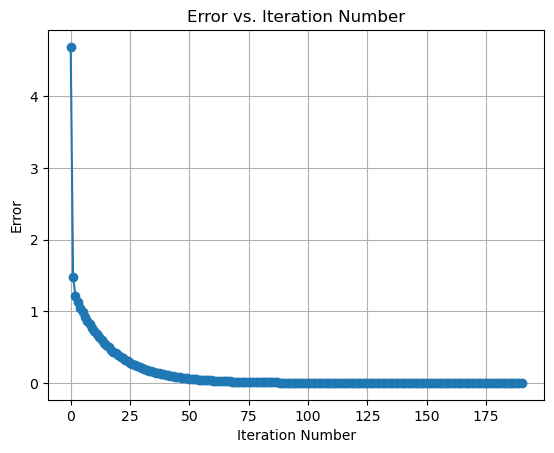

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.21364749 1.92729547 2.33572793 2.52329591 2.52329591
  2.33572793 1.92729547 1.21364749 0.        ]
 [0.         1.92729547 3.15980827 3.89232279 4.23416257 4.23416257
  3.89232279 3.15980827 1.92729547 0.        ]
 [0.         2.33572793 3.89232279 4.83959697 5.28687424 5.28687424
  4.83959697 3.89232279 2.33572793 0.        ]
 [0.         2.52329591 4.23416257 5.28687424 5.78687024 5.78687024
  5.28687424 4.23416257 2.52329591 0.        ]
 [0.         2.52329591 4.23416257 5.28687424 5.78687024 5.78687024
  5.28687424 4.23416257 2.52329591 0.        ]
 [0.         2.33572793 3.89232279 4.83959697 5.28687424 5.28687424
  4.83959697 3.89232279 2.33572793 0.        ]
 [0.         1.92729547 3.15980827 3.89232279 4.23416257 4.23416257
  3.89232279 3.15980827 1.92729547 0.        ]
 [0.         1.21364749 1.92729547 2.33572793 2.52329591 2.52329591
  2.33572793 1.92729

In [9]:
mesh=10
threshold=1e-5
#u = generate_matrix(mesh, sparsity=0.1)
u = np.ones((mesh,mesh))
b = np.ones((mesh,mesh))
A = np.zeros((mesh,mesh))
#Setting Boundary Conditions
u[0,:]=0
u[:,0]=1
u[mesh-1,:]=0
u[:,mesh-1]=1
u1=u.copy()
#Running Jacobi
error,u,itr = jacobi(mesh,A,u,b,threshold,w1,w2,w3)
print("Error after ",itr," iterations: ",error[-1])
#plotContour(u1,'Orignal')
#plotContour(u,'Output')
plotHeat(u1,'Orignal')
plotHeat(u,'Output')
plotError(error,itr)
print(u)
u2=u.copy()

In [10]:
def bicgstab_(A,u,b,threshold):
    print("Bi-Conjugate Gradient Stablized Algorithm")
    x = u.copy() # Initial guess x0
    r = b - A.dot(x)  # Compute r0
    
    p = r.copy()  # Set p0 to r0
    r_star=r.copy()
    rs_old = np.dot(r, r_star)
    itr=0;
    while(1):
        itr+=1
        Ap=A.dot(p)
        alpha=rs_old/np.dot(Ap,r_star)
        s=r-alpha*Ap
        As=A.dot(s)
        w=As.dot(s)/As.dot(As)
        x= x+ alpha*p 
        x= x+ w*s
        r = s - w*As
        rs_new = np.dot(r,r_star)
        error= np.linalg.norm(rs_new)
        if error < threshold:
            print("Error in ", itr ," itr: ",error)
            break  # Convergence achieved
        beta = (rs_new/rs_old)*(alpha/w)
        p=  rs_new + beta*(p-w*Ap)
        rs_old=rs_new
        print("Error in ",itr, " itr: ",error)
    return x

In [11]:
def jacobiit(A,u,b,threshold):
    print("Jacobi Iteration Algorithm")
    dia_A, rnd_A = separate_diagonal(A)
    D_inv = np.linalg.inv(dia_A)
    T = D_inv.dot(rnd_A)
    x=u.copy()
    itr=0
    while(1):
        itr+=1
        x_new = np.dot(D_inv,b) - np.dot(T,x)
        error= np.linalg.norm(x_new-x)
        x=x_new
        if error < threshold:
            print("Error in ", itr ," itr: ",error)
            break  # Convergence achieved
        if error > 10e10:
            print("Diverged")
            break
        print("Error in ",itr, " itr: ",error)
        if itr==7:
            break
    return x

In [19]:
mesh=4096
threshold=1e-5
sparsity=0.8
#file_path = "A.txt"

#A = np.loadtxt(file_path)
A=generate_matrix(mesh,0.995)
A_csr = csr_matrix(A)
print(A_csr.nnz)
np.savetxt('A_4096.txt', A)

88331


using library
0


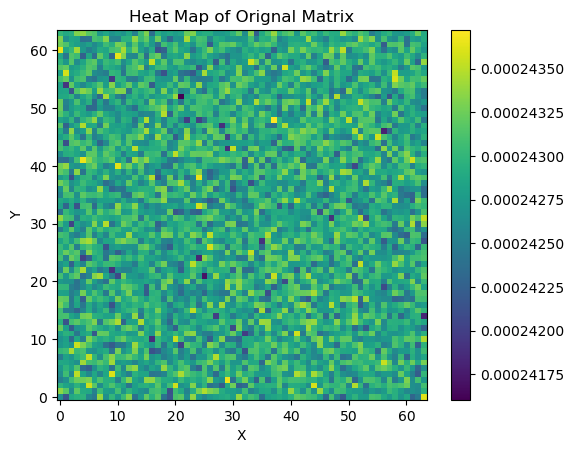

Conjugate Gradient Algorithm
iteration:  0
Error in  0  itr:  309.3177565964438
iteration:  1
Error in  1  itr:  0.3748813333757634
iteration:  2
Error in  2  itr:  0.000672332461174614
iteration:  3
Error in  3  itr:  1.2396998840259287e-06


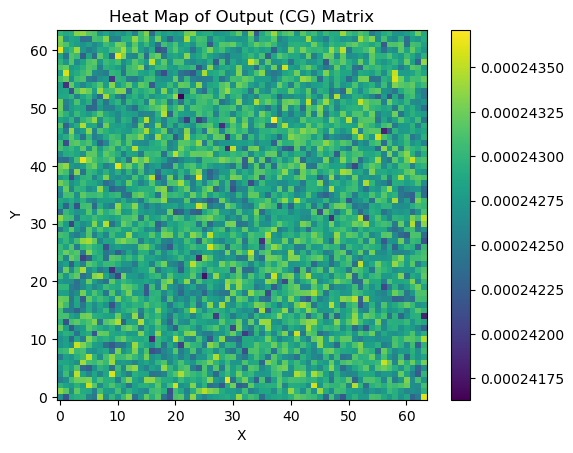

Bi-Conjugate Gradient Stablized Algorithm
Error in  1  itr:  46136.44472997606
Error in  2  itr:  0.5199057521557781
Error in  3  itr:  0.03348256224365425
Error in  4  itr:  4.375774605461784e-06


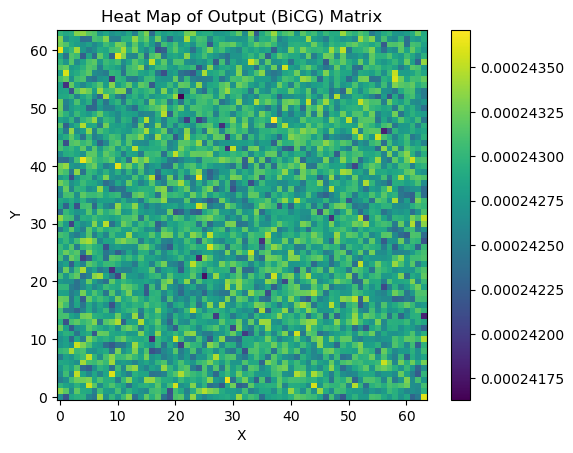

Jacobi Iteration Algorithm
Error in  1  itr:  64.14323958974894
Error in  2  itr:  0.16357866070749816
Error in  3  itr:  0.00040569770044747346
Error in  4  itr:  1.0049418550613987e-06


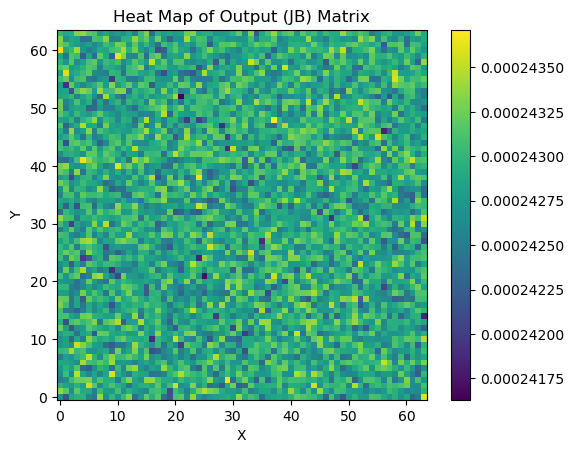

In [18]:

u = np.ones(mesh)
b = np.ones(mesh)
u1=u.copy()

print("using library")
x, info = bicgstab(A, b,x0=u)
print(info)
plotHeat(x.reshape(int(sqrt(mesh)),int(sqrt(mesh))),'Orignal')
#plotHeat(x.reshape(int(sqrt(mesh)),int(sqrt(mesh))),'Output (lib)')

x1 = conjugate_gradient(A,u, b,threshold)
plotHeat(x1.reshape(int(sqrt(mesh)),int(sqrt(mesh))),'Output (CG)')
#print(x1)
x2 = bicgstab_(A,u, b,threshold)
plotHeat(x1.reshape(int(sqrt(mesh)),int(sqrt(mesh))),'Output (BiCG)')
#print(x2)
x3=jacobiit(A,u,b,threshold)
plotHeat(x3.reshape(int(sqrt(mesh)),int(sqrt(mesh))),'Output (JB)')
#print(x3)
#x4 = bicgstab_(A,x3, b,threshold)
#print(x4)


In [ ]:
def is_diagonally_dominant(matrix):
    # Ensure matrix is CSR format
    if not isinstance(matrix, csr_matrix):
        raise ValueError("Input matrix must be in CSR format")

    # Get number of rows
    num_rows = matrix.shape[0]

    # Iterate over each row
    for i in range(num_rows):
        row_start = matrix.indptr[i]
        row_end = matrix.indptr[i+1]
        row_data = matrix.data[row_start:row_end]
        row_indices = matrix.indices[row_start:row_end]
        
        # Calculate the sum of absolute values of off-diagonal elements
        off_diag_sum = np.sum(np.abs(row_data[row_indices != i]))

        # Check diagonal dominance condition
        if off_diag_sum >= np.abs(matrix[i, i]):
            return False

    return True

print( is_diagonally_dominant(A))

True


In [ ]:
print(size(float))

NameError: name 'size' is not defined

In [ ]:
print(getsizeof(float))

NameError: name 'getsizeof' is not defined

In [ ]:
import sys

# Get the size of a float
float_size = sys.getsizeof(float())

print("Size of a float in bytes:", float_size)


Size of a float in bytes: 24
